In [24]:
import tensorflow as tf 
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [25]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(256,256),
    batch_size=32)

Found 2152 files belonging to 3 classes.


In [26]:
class_names=dataset.class_names

In [27]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [28]:
len(dataset)

68

In [29]:
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

(256, 256, 3)
[1 0 0 0 0 1 1 1 1 1 1 0 1 0 2 1 0 0 0 0 0 2 1 0 1 0 0 0 0 1 1 0]
(256, 256, 3)
[0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 2]
(256, 256, 3)
[1 0 2 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0]


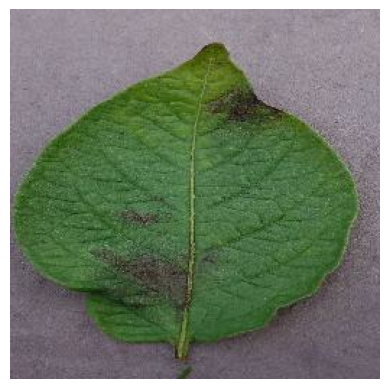

In [30]:
for image_batch,label_batch in dataset.take(3):
    print(image_batch[0].shape)
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print(label_batch.numpy())
    plt.axis("off")

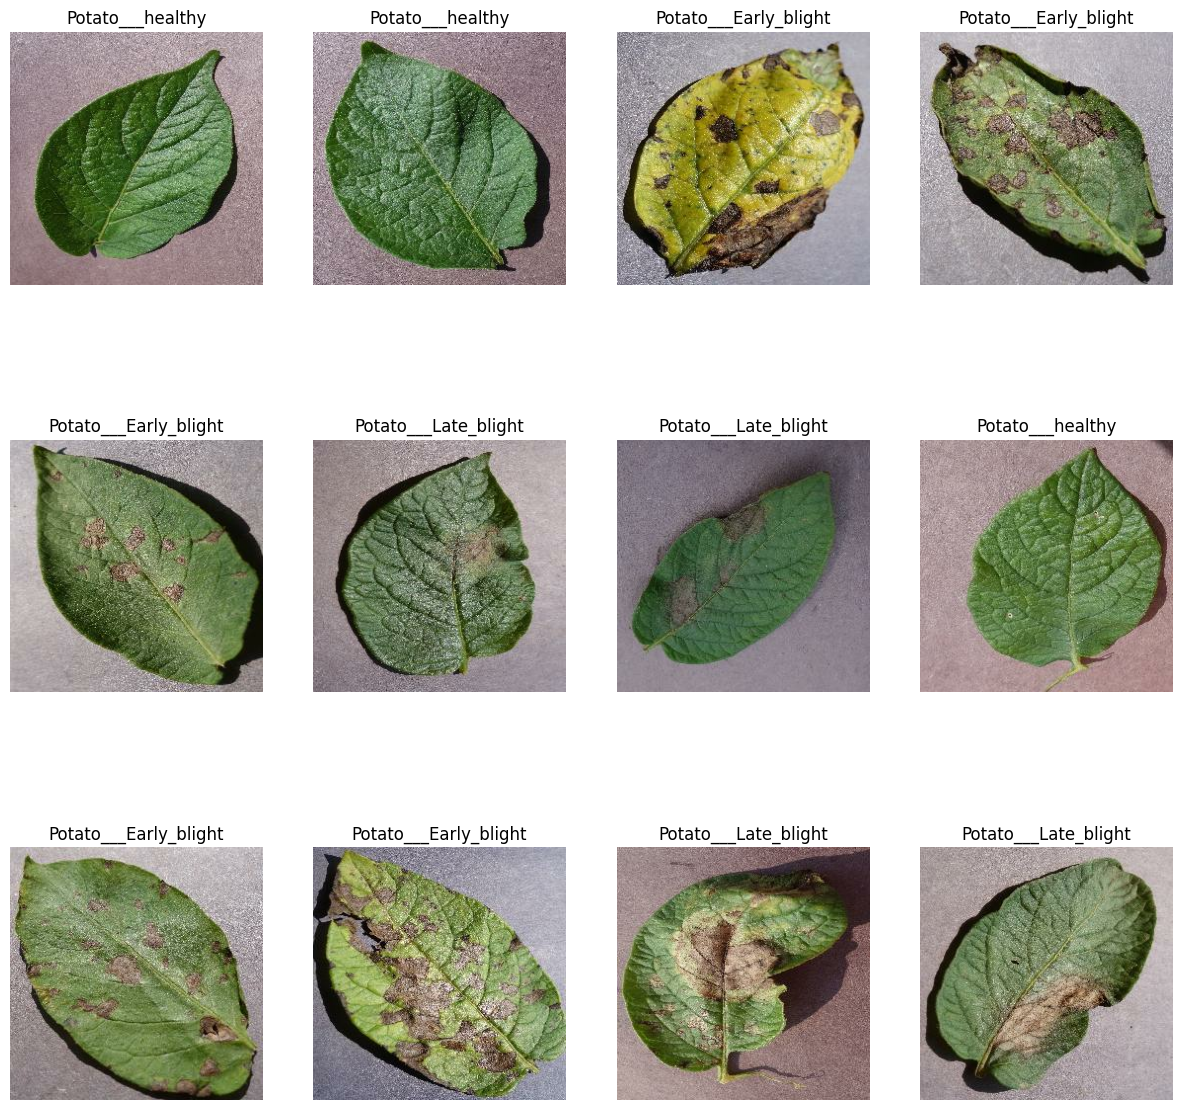

In [31]:
plt.figure(figsize=(15,15))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [32]:
len(dataset)

68

In [33]:
epochs=50
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [34]:
train_dataset=dataset.take(54)

len(train_dataset)

54

In [35]:
test_dataset=dataset.skip(54)
len(test_dataset)

14

In [36]:

validation_dataset=test_dataset.take(7)
len(validation_dataset)

7

In [37]:
len(test_dataset)

14

In [39]:
test_dataset = test_dataset.skip(7)

In [40]:
len(test_dataset)

7

In [41]:
from tensorflow.keras import layers

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(256, 256),
    layers.Rescaling(1.0 / 255)
])


In [42]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [43]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valdation_dataset = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

model=models.Sequential([resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activayion='relu',input_shape=(256,256),
    layers.pooling2D(2,2)),
    layers.Conv2D(64,(3,3),activayion='relu',input_shape=(256,256),
    layers.pooling2D(2,2)),
    layers.Conv2D(64,(3,3),activayion='relu',input_shape=(256,256),
    layers.pooling2D(2,2)),
    layers.Conv2D(64,(3,3),activayion='relu',input_shape=(256,256),
    layers.pooling2D(2,2)),
    layers.Conv2D(64,(3,3),activayion='relu',input_shape=(256,256),
    layers.pooling2D(2,2)),
    layers.Conv2D(64,(3,3),activayion='relu',input_shape=(256,256),
    layers.pooling2D(2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

model.build((256,256))
    

In [44]:
from tensorflow.keras import layers, models
n_classes=15
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build((32,256, 256, 3))


In [45]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 15)                    │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 184,527 (720.81 KB)

 Trainable params: 184,527 (720.81 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [47]:
history = model.fit(
    train_dataset,
    epochs=50,
    verbose=1,
    validation_data=validation_dataset
)


Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.4488 - loss: 1.4556 - val_accuracy: 0.6473 - val_loss: 0.9012
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.5241 - loss: 0.9044 - val_accuracy: 0.5312 - val_loss: 0.7468
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.6539 - loss: 0.6921 - val_accuracy: 0.6786 - val_loss: 0.5726
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.8151 - loss: 0.4421 - val_accuracy: 0.8214 - val_loss: 0.3722
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.8777 - loss: 0.3000 - val_accuracy: 0.8750 - val_loss: 0.2554
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.8821 - loss: 0.2708 - val_accuracy: 0.9420 - val_loss: 0.1547
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9085 - loss: 0.2409 - val_accuracy: 0.9107 - val_loss: 0.2042
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9207 - loss: 0.1992 - val_accuracy: 0.9330 - val_loss:

In [48]:
scores= model.evaluate(test_dataset)

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step - accuracy: 1.0000 - loss: 0.0056


In [49]:
scores

[0.005792660638689995, 1.0]

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step
predicted label: Potato___Early_blight


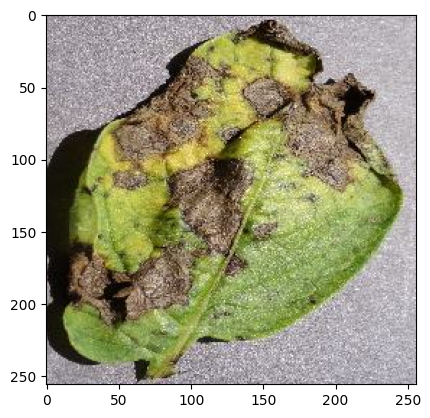

In [51]:
import numpy as np
for images_batch, labels_batch in test_dataset.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [52]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


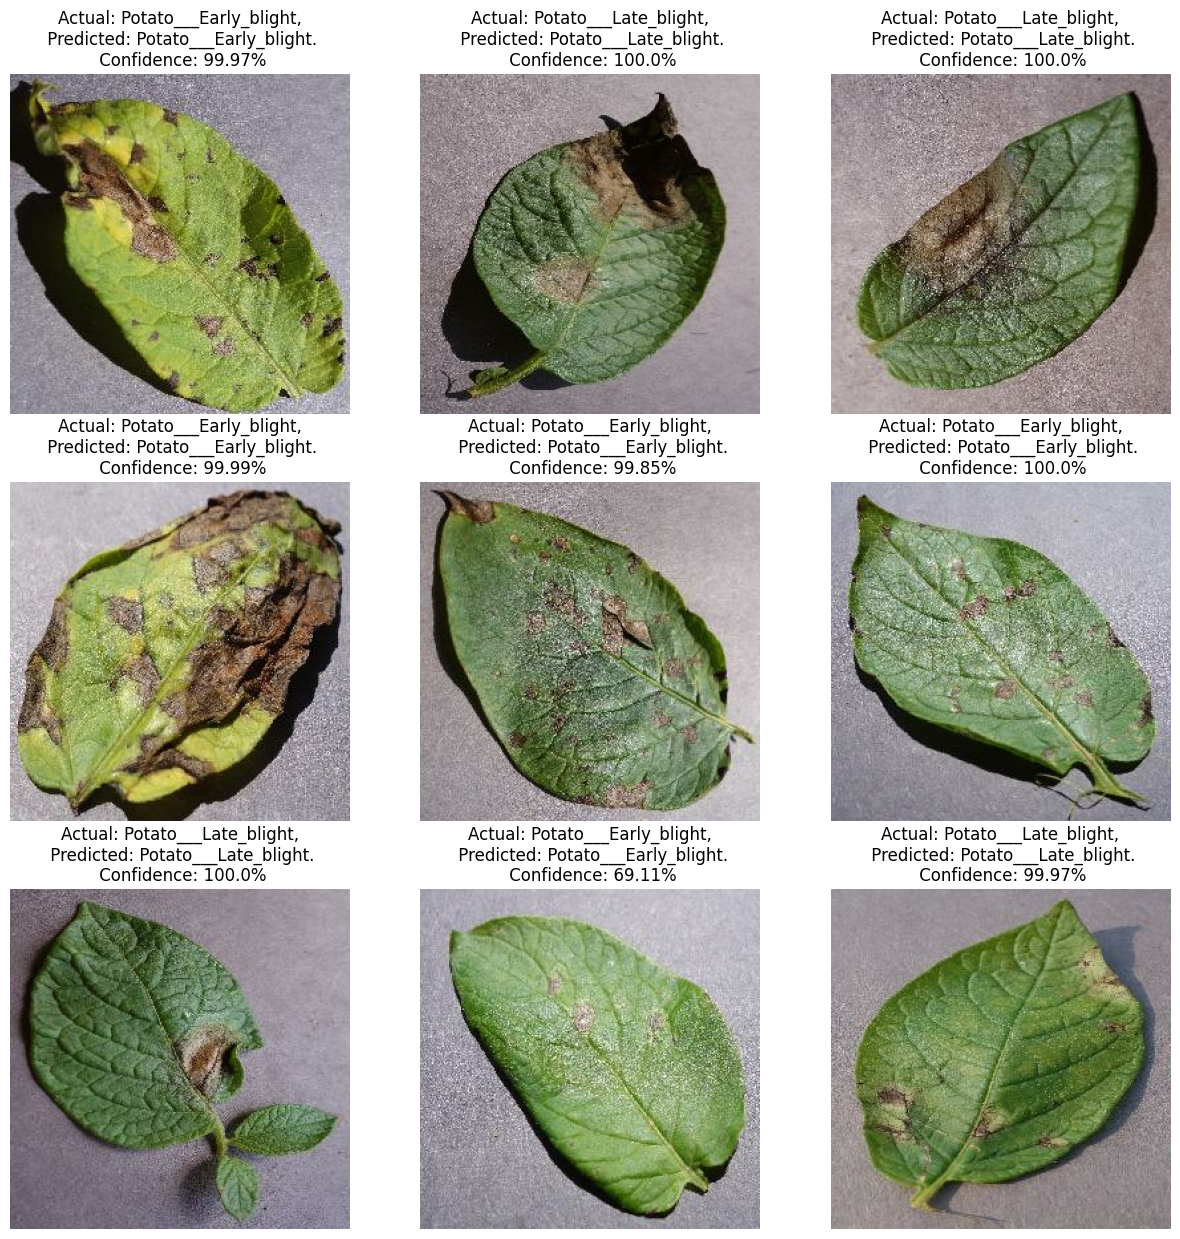

In [54]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [60]:
import os
model_version = max([int(i) for i in os.listdir("C:/Users/dynabook/Desktop/python notebook/plant_disease/models") + [0]]) + 1
model.save(f"C:/Users/dynabook/Desktop/python notebook/plant_disease/models/{model_version}.keras")
